## Open AI Playbook 🤖
#### By: Sebastian Medina Jimenez
Let's start 🚀


Additional sources: 
* Documentation about prompting https://learnprompting.org/docs/intro 
* Open AI documentation https://platform.openai.com/docs/introduction 
* Prompt examples https://platform.openai.com/examples


# 1. Connecting to text models

In [1]:
API_KEY = # Your api key


In [2]:
import openai

# Set up the OpenAI API client
openai.api_key = API_KEY
# Prompt
prompt = "What is Python?"
# Call the OpenAI API
response = openai.Completion.create(
    engine="text-davinci-002",
    prompt=prompt,
    max_tokens=30,  # Adjust this based on the desired response length
)
# Extract and print the model's response
answer = response.choices[0].text.strip()
print("GPT-3's Answer:", answer)


GPT-3's Answer: Python is a programming language.


It returns a string json object

In [4]:
response

<OpenAIObject text_completion id=cmpl-80zkHFEZwGGYpWqnt4MLQsnMbGa8J at 0x7f8360090270> JSON: {
  "warning": "This model version is deprecated. Migrate before January 4, 2024 to avoid disruption of service. Learn more https://platform.openai.com/docs/deprecations",
  "id": "cmpl-80zkHFEZwGGYpWqnt4MLQsnMbGa8J",
  "object": "text_completion",
  "created": 1695248041,
  "model": "text-davinci-002",
  "choices": [
    {
      "text": "\n\nPython is a programming language.",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 4,
    "completion_tokens": 8,
    "total_tokens": 12
  }
}

## OpenAI Completion Function - `openai.Completion.create`

In OpenAI, you can use the `openai.Completion.create` function to generate text completions from various models, including GPT-3.5-turbo. Below are some of the key parameters that you can modify when using this function, along with brief explanations:

1. **`engine`**:
   - *Description*: Specifies the model/engine you want to use for text completion. For chat applications, "text-davinci-002" or "gpt-3.5-turbo" are commonly used.
   - *Options*: Engine/model names like "text-davinci-002" or "gpt-3.5-turbo."

2. **`prompt`**:
   - *Description*: The text or prompt that you provide to the model as input. It instructs the model and serves as the starting point for generating responses.

3. **`max_tokens`**:
   - *Description*: Sets an arbitrary limit on the length of the response generated by the model. Useful to prevent overly long responses.
   - *Example*: `50` to limit the response to 50 tokens.

4. **`temperature`**:
   - *Description*: Controls the randomness of the model's responses. Higher values (e.g., 0.8) make the output more random, while lower values (e.g., 0.2) make it more deterministic.
   - *Range*: Typically between 0.2 and 1.0.

5. **`top_p`**:
   - *Description*: Implements nucleus sampling by excluding responses with cumulative probability above a certain threshold. Helps control response quality and randomness.
   - *Range*: Typically between 0.1 and 1.0.

6. **`frequency_penalty`**:
   - *Description*: Adjusts the penalty for using frequent tokens. Higher values make the model more conservative in word choice.
   - *Example*: `0.2` to encourage diverse word choices.

7. **`presence_penalty`**:
   - *Description*: Adjusts the penalty for using previously seen tokens. Higher values encourage repetition avoidance.
   - *Example*: `0.5` to discourage repeating the same phrases.

8. **`stop`**:
   - *Description*: Specifies one or more tokens at which the model should stop generating text. Useful for controlling the length and structure of responses.
   - *Example*: `["\n"]` to stop the generation at the first newline character.

9. **`user` and `assistant` roles** within the `messages` array:
   - *Description*: You can use these roles to guide the model's behavior in conversations. Messages alternate between these roles to create interactive dialogues.

10. **`system` role within the `messages` array:
    - *Description*: System-level instructions provide high-level guidance to the model, influencing its behavior throughout the conversation.


# 2. Connecting to chat

In [2]:
import openai

# Set up the OpenAI API client
openai.api_key = API_KEY
# Initialize the conversation
conversation = [
    {"role": "system", "content": "You are an app support person of Rappi"},
    {"role": "user", "content": "Hello, I'm interested in an Apple product. Can you tell me more about it?"},
]
# Function to chat
response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=conversation,
)


In [3]:
response.choices[0].message

<OpenAIObject at 0x7f79c89bb310> JSON: {
  "role": "assistant",
  "content": "Of course! I'd be happy to help you with any information you need about Apple products. Apple offers a wide range of devices, including iPhones, iPads, Mac computers, Apple Watches, and more. Which specific product are you interested in?"
}

In [4]:
conversation.append({"role": "user", "content": 'Can you give me technical description of iphone 12 only about camera?'})

In [6]:
response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=conversation,
)

In [7]:
response.choices[0].message

<OpenAIObject at 0x7f79c89bb810> JSON: {
  "role": "assistant",
  "content": "Certainly! The iPhone 12 features an advanced camera system that offers an exceptional photography and videography experience. Here are the highlights of the camera specifications:\n\n1. Dual Rear Cameras: The iPhone 12 has two lenses on its back:\n   - Wide: It has a 12 MP wide camera with an aperture of f/1.6. This lens captures detailed photos with great low-light performance.\n   - Ultra-Wide: The ultra-wide camera also boasts a 12 MP sensor with an aperture of f/2.4. It provides a wider field of view, allowing you to capture more expansive landscapes or fit more subjects into a single shot.\n\n2. Night Mode: The camera system includes Night Mode for both the wide and ultra-wide lenses. It enables you to capture stunning low-light photos with enhanced clarity, reduced noise, and improved color accuracy.\n\n3. Deep Fusion: This feature uses machine learning to optimize image details and texture in medium- 

In [8]:
conversation.append({"role": "user", "content": 'Now give me last answe but in json format separating it by characteristic'})

In [9]:
response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=conversation,
)

In [13]:
import json 
json.loads(response.choices[0].message["content"])

{'Product': 'iPhone 12',
 'Camera': {'Rear Camera': {'Main Camera': '12 MP, f/1.6 aperture',
   'Ultra Wide Camera': '12 MP, f/2.4 aperture',
   'Night Mode': 'Yes',
   'Deep Fusion': 'Yes',
   'Smart HDR 3': 'Yes',
   'Dual Optical Image Stabilization': 'Yes',
   '4K Dolby Vision HDR recording': 'Yes'},
  'Front Camera': {'TrueDepth Camera': '12 MP, f/2.2 aperture',
   'Night Mode': 'Yes',
   'Deep Fusion': 'Yes',
   'Smart HDR 3': 'Yes',
   'Portrait Mode': 'Yes',
   '4K Dolby Vision HDR recording': 'Yes'}}}

## OpenAI Chat Model Parameters

In OpenAI's Chat models like GPT-3.5-turbo, you can adjust various parameters to control the behavior and output of the model. Here are some of the key parameters that you can modify and a brief explanation of each:

1. **`model`**:
   - *Description*: Specifies the model you want to use. For example, you can set it to "gpt-3.5-turbo" for chat-based applications.
   - *Options*: Model names like "gpt-3.5-turbo."

2. **`messages`**:
   - *Description*: An array of message objects that make up the conversation between the user and the model. Messages alternate between "user" and "assistant" roles.
   - *Example*: `[{"role": "user", "content": "Tell me a joke."}]`

3. **`temperature`**:
   - *Description*: Controls the randomness of the model's responses. Higher values (e.g., 0.8) make the output more random, while lower values (e.g., 0.2) make it more deterministic.
   - *Range*: Typically between 0.2 and 1.0.

4. **`max_tokens`**:
   - *Description*: Sets an arbitrary limit on the length of the response generated by the model. Useful to prevent overly long responses.
   - *Example*: `50` to limit the response to 50 tokens.

5. **`top_p`**:
   - *Description*: Implements nucleus sampling by excluding responses with cumulative probability above a certain threshold. Helps control response quality and randomness.
   - *Range*: Typically between 0.1 and 1.0.

6. **`frequency_penalty`**:
   - *Description*: Adjusts the penalty for using frequent tokens. Higher values make the model more conservative in word choice.
   - *Example*: `0.2` to encourage diverse word choices.

7. **`presence_penalty`**:
   - *Description*: Adjusts the penalty for using previously seen tokens. Higher values encourage repetition avoidance.
   - *Example*: `0.5` to discourage repeating the same phrases.

8. **`stop`**:
   - *Description*: Specifies one or more tokens at which the model should stop generating text. Useful for controlling the length and structure of responses.
   - *Example*: `["\n"]` to stop the generation at the first newline character.

9. **`user` and `assistant` roles** within the `messages` array:
   - *Description*: You can use these roles to guide the model's behavior. For example, you can provide system-level instructions like `"role": "system", "content": "You are an assistant that speaks like Shakespeare."` to influence the style of the response.

10. **`system` role** within the `messages` array:
   - *Description*: System-level instructions provide high-level guidance to the model, influencing its behavior throughout the conversation.



# 3. Connecting to image models

In [14]:
import openai

openai.api_key = API_KEY
# Prompt
prompt = "Centered real red apple in white background, upper right green box with word 'Manzana Roja'"
# Call the OpenAI API
response = openai.Image.create(
    prompt=prompt,
    model="image-alpha-001",
    size="1024x1024",
    response_format="url"
)

Response is an url

In [17]:
print(response["data"][0]["url"])
url_apple = response["data"][0]["url"]

https://oaidalleapiprodscus.blob.core.windows.net/private/org-qu1dgtIBim1vCyCj9o0hRgRN/user-aorxN8s8MR9mGHt6VnWB6hme/img-iq6DfvLcsP2vI9LtTSbnBRIv.png?st=2023-09-20T21%3A45%3A58Z&se=2023-09-20T23%3A45%3A58Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2023-09-20T21%3A54%3A05Z&ske=2023-09-21T21%3A54%3A05Z&sks=b&skv=2021-08-06&sig=/3wym/nPVoaB9W2qhxMijYI35pcJJv5xiJe/k5l0J1U%3D


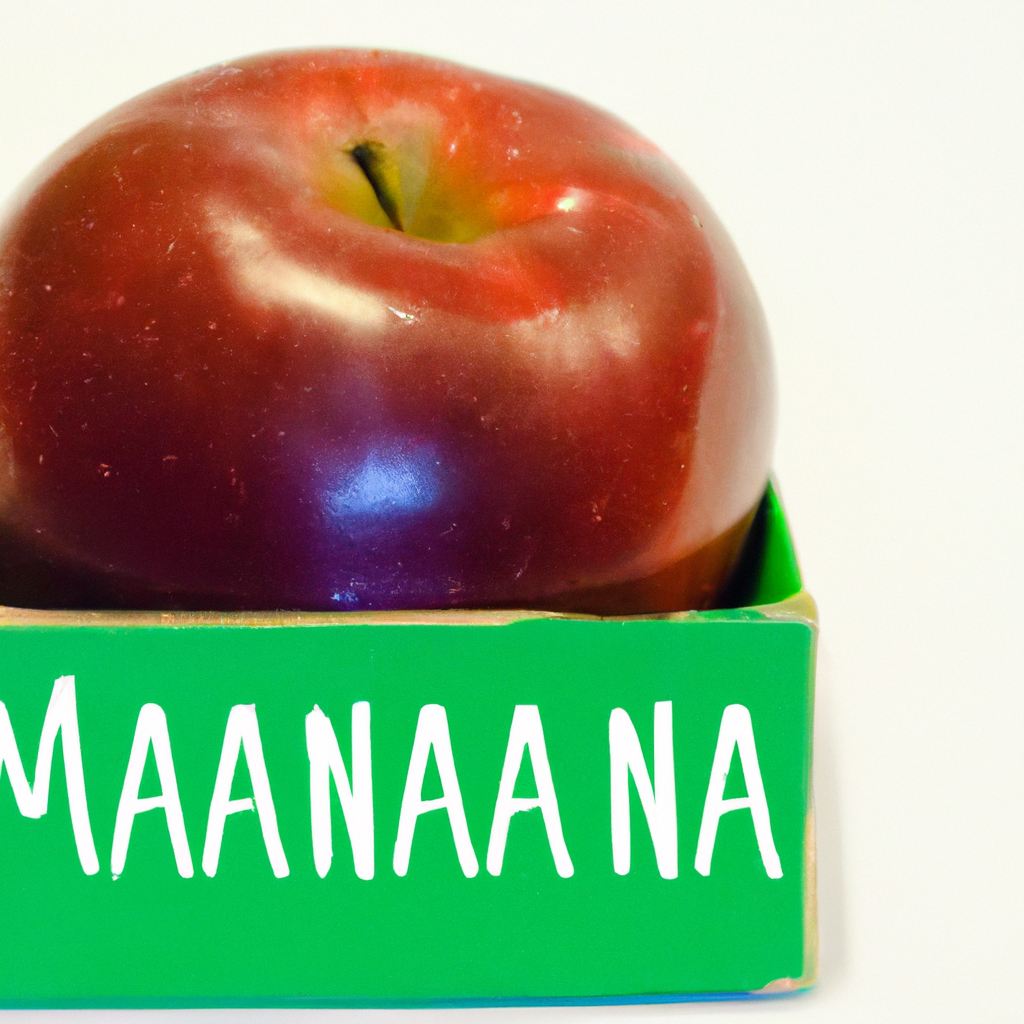

In [19]:
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display

def show_image_from_url_in_notebook(image_url):
    try:
        response = requests.get(image_url)
        response.raise_for_status()  # Check for HTTP errors

        # Open the image from the response content
        img = Image.open(BytesIO(response.content))

        # Display the image in the notebook
        display(img)
    
    except Exception as e:
        print("Error:", e)

show_image_from_url_in_notebook(url_apple)


## OpenAI Image Creation Function - `openai.Image.create`

In OpenAI, you can use the `openai.Image.create` function to generate images based on text descriptions. Below are the key parameters that you can modify when using this function, along with brief explanations:

1. **`prompt`**:
   - *Description*: A text description of the desired image(s). It serves as input to instruct the model on what images to generate.
   - *Maximum Length*: 1000 characters.

2. **`n`**:
   - *Description*: The number of images to generate. Must be between 1 and 10.
   - *Default*: 1

3. **`size`**:
   - *Description*: The size of the generated images. You can specify one of the following sizes: 256x256, 512x512, or 1024x1024.
   - *Default*: 1024x1024

4. **`response_format`**:
   - *Description*: The format in which the generated images are returned. You can choose between "url" (image URLs) or "b64_json" (base64-encoded image data in JSON format).
   - *Default*: url

